<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/process/MultiphaseflowMeasurement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Multiphase flow measurements
#@markdown This document is part of the module ["Introduction to Gas Processing using NeqSim in Colab"](https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/examples_of_NeqSim_in_Colab.ipynb#scrollTo=_eRtkQnHpL70).
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
%matplotlib inline

# Multiphase flow measurement
A multiphase flow meter is a device used to measure the individual phase flow rates of constituent phases in a given flow (for example in oil and gas industry) where oil, water and gas mixtures are initially co-mingled together during the oil production processes.

# Litterature

Wikipedia

https://en.wikipedia.org/wiki/Multiphase_flow_meter


HANDBOOK OF MULTIPHASE FLOW METERING:

https://nfogm.no/wp-content/uploads/2014/02/MPFM_Handbook_Revision2_2005_ISBN-82-91341-89-3.pdf

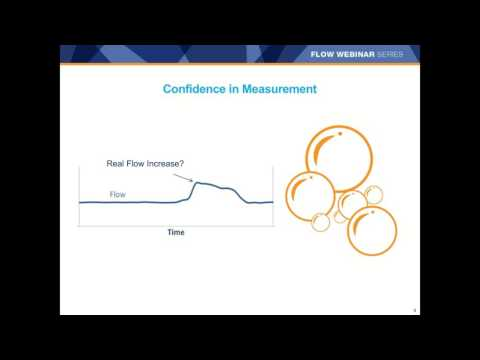

In [7]:
#@title Webinar: Advances in Multiphase Metering for Onshore Measurement in Oil & Gas
#@markdown This video gives an intriduction to Oil & Gas facilities Design
from IPython.display import YouTubeVideo
YouTubeVideo('mcxrjJwidl0', width=600, height=400)

# Calculation of PVT properties for a multiphase flow meter

A typical multi phase flow meter will need calclation of various thermodynamic and physical properties. SUch properties have to be updated s the field is produced. The input to the property calculations are a characterized fluid composition from PVT studies.

The following script demonstrates calculation of PVT properties for a multi phase flow meter using a CHaracterized fluid composition.

                          total         gas          oil                     
           nitrogen  9.34579E-3  9.34579E-3   9.34579E-3      [mole fraction]
                CO2  1.86916E-2  1.86916E-2   1.86916E-2      [mole fraction]
            methane  5.14019E-1  5.14019E-1   5.14019E-1      [mole fraction]
             ethane  9.34579E-2  9.34579E-2   9.34579E-2      [mole fraction]
            propane  3.73832E-2  3.73832E-2   3.73832E-2      [mole fraction]
           i-butane  1.86916E-2  1.86916E-2   1.86916E-2      [mole fraction]
           n-butane  1.86916E-2  1.86916E-2   1.86916E-2      [mole fraction]
          i-pentane  9.34579E-3  9.34579E-3   9.34579E-3      [mole fraction]
          n-pentane  9.34579E-3  9.34579E-3   9.34579E-3      [mole fraction]
              C6_PC  9.34579E-2  9.34579E-2   9.34579E-2      [mole fraction]
              C7_PC  1.02804E-1  1.02804E-1   1.02804E-1      [mole fraction]
              C8_PC  1.40187E-2  1.40187E-2   1.40187E-2      [m

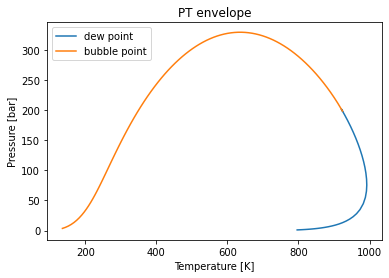

JavaObject id=o119

In [12]:
names = ['nitrogen','CO2', 'methane', 'ethane', 'propane','i-butane','n-butane','i-pentane','n-pentane']
molefractions = [0.01, 0.02, 0.55, 0.1, 0.04, 0.02, 0.02, 0.01, 0.01]
fluidDefinedComponents = createfluid2(names, molefractions, "mol/sec")

charNames = ["C6", "C7", "C8", "C9-C10", "C11-C80"]
charFlowrate = [0.1, 0.11, 0.015, 0.024, 0.041]
molarMass = [0.90, 0.100, 0.120, 0.150, 0.25]
density = [700.0e-3, 750.0e-3, 810.0e-3, 880.0e-3, 900.0e-3]
characterizedFluid = addOilFractions(fluidDefinedComponents, charNames,charFlowrate,molarMass,  density);
printFrame(characterizedFluid)
print('phase envelope for characterized fluid')
phaseenvelope(characterizedFluid, True)

## Generation of properties for multiphase measurements

The following script demonstrates how to generate typical properties for a multiphase flow meter.

In [9]:
pressures = [10.0, 20.0, 30.0, 40.0, 50.0]
temperatures = [10.0, 20.0, 30.0, 40.0, 50.0]

gasViscosity = [np.nan]*len(pressures)
oilViscosity = [np.nan]*len(pressures)
gasDensity = [np.nan]*len(pressures)
oilDensity = [np.nan]*len(pressures)

import numpy
a = numpy.empty((10, 10))
a.fill(foo)

for i in range(len(pressures)):
  for j in range(len(pressures)):
    characterizedFluid.setPressure(pressures[i])
    characterizedFluid.setTemperature(temperatures[i]+273.15)
    TPflash(characterizedFluid)
    characterizedFluid.initProperties()
    if(characterizedFluid.hasPhaseType("gas")):
      gasViscosity[i]=characterizedFluid.getPhase("gas").getViscosity("cP")
      gasDensity[i]=characterizedFluid.getPhase("gas").getDensity("kg/m3")
    if(characterizedFluid.hasPhaseType("oil")):
      oilViscosity[i]=characterizedFluid.getPhase("oil").getViscosity("cP")
      oilDensity[i]=characterizedFluid.getPhase("oil").getDensity("kg/m3")


PVTdata = pd.DataFrame({'pressure' : pressures,
                                'temperature' : temperatures,
                                'gasViscosity' : gasViscosity,
                                'oilViscosity' : oilViscosity, 
                                'gasDensity' : gasDensity, 
                                'oilDensity' : oilDensity}, 
                                columns=['pressure','temperature', 'gasViscosity','oilViscosity','gasDensity', 'oilDensity'])

display(PVTdata)

NameError: ignored

In [16]:
import numpy
import numpy as np

pressures = [10.0, 20.0, 30.0, 40.0, 50.0]
temperatures = [10.0, 20.0, 30.0, 40.0, 50.0]

numP = len(pressures)
numT = len(temperatures)

gasViscosity = numpy.zeros((numP, numT))
oilViscosity = numpy.zeros((numP, numT))
gasDensity = numpy.zeros((numP, numT))
oilDensity = numpy.zeros((numP, numT))

gasViscosity[:] = np.NaN
gasViscosity

for i in range(len(temperatures)):
  for j in range(len(pressures)):
    characterizedFluid.setPressure(pressures[j])
    characterizedFluid.setTemperature(temperatures[i]+273.15)
    TPflash(characterizedFluid)
    characterizedFluid.initProperties()
    if(characterizedFluid.hasPhaseType("gas")):
      gasViscosity[i][j]=characterizedFluid.getPhase("gas").getViscosity("cP")
      gasDensity[i][j]=characterizedFluid.getPhase("gas").getDensity("kg/m3")
    if(characterizedFluid.hasPhaseType("oil")):
      oilViscosity[i][j]=characterizedFluid.getPhase("oil").getViscosity("cP")
      oilDensity[i][j]=characterizedFluid.getPhase("oil").getDensity("kg/m3")


display(oilDensity[0])
display(oilDensity[1])


array([706.8016456 , 699.84762927, 693.66419406, 687.77896849,
       682.02890249])

array([705.26997731, 698.54926341, 692.61911945, 687.01555219,
       681.573414  ])